In [2]:
class Operation():
    def __init__(self,input_nodes=[]):
        self.input_nodes=input_nodes
        self.output_nodes=[]
        
        for node in input_nodes:
            node.output_nodes.append(self)
        _default_graph.operations.append(self)
    def compute():
        pass

In [3]:
class add(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
    def compute(self,x_var,y_var):
        self.inputs=[x_var,y_var]
        return x_var+y_var

In [4]:
class multiply(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
    def compute(self,x_var,y_var):
        self.inputs=[x_var,y_var]
        return x_var*y_var

In [5]:
class matmul(Operation):
    def __init__(self,x,y):
        super().__init__([x,y])
    def compute(self,x_var,y_var):
        self.inputs=[x_var,y_var]
        return x_var.dot(y_var)

In [6]:
class Placeholder():
    def __init__(self):
        self.output_nodes=[]
        _default_graph.placeholders.append(self)

In [15]:
class Variable():
    def __init__(self,initial_value=None):
        self.value=initial_value
        self.output_nodes=[]
        _default_graph.variables.append(self)

In [11]:
class Graph():
    def __init__(self):
        self.operations=[]
        self.placeholders=[]
        self.variables=[]
    def set_as_default(self):
        global _default_graph
        _default_graph=self

In [50]:
g=Graph()

In [51]:
g.set_as_default()

In [52]:
A=Variable(10)

In [53]:
b=Variable(1)

In [54]:
x=Placeholder()

In [55]:
y=multiply(A,x)

In [56]:
z=add(y,b)

In [57]:
import numpy as np

In [91]:
def traverse_postorder(operation):
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    #print(nodes_postorder)
    return nodes_postorder

In [92]:
class Session():
    
    def run(self,operation,feed_dict={}):
        nodes_postorder=traverse_postorder(operation)
        for node in nodes_postorder:
            if(type(node)==Placeholder):
                node.output=feed_dict[node]
            elif(type(node)==Variable):
                node.output=node.value
            else:
                node.inputs=[input_node.output for input_node in node.input_nodes]
                node.output=node.compute(*node.inputs)
            if(type(node.output)==list):
                node.output=np.array(node.output)
        return operation.output

In [93]:
sess=Session()

In [94]:
result=sess.run(operation=z,feed_dict={x:10})

[<__main__.Variable object at 0x000001ECAFAD4BA8>, <__main__.Placeholder object at 0x000001ECAFAD4668>, <__main__.matmul object at 0x000001ECAFAD49B0>, <__main__.Variable object at 0x000001ECAFAD4B70>, <__main__.add object at 0x000001ECAFAD4A90>]


In [95]:
result

array([[101, 202],
       [301, 402]])

In [80]:
g=Graph()

In [81]:
g.set_as_default()

In [82]:
A=Variable([[10,20],[30,40]])
b=Variable([1,2,])


In [83]:
x=Placeholder()

In [84]:
y=matmul(A,x)

In [85]:
z=add(y,b)

In [86]:
sess=Session()

In [87]:
sess.run(operation=z,feed_dict={x:10})

array([[101, 202],
       [301, 402]])

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [98]:
sample_z=np.linspace(-10,10,100)
sample_a=sigmoid(sample_z)

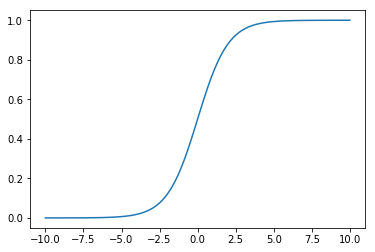

In [99]:
plt.plot(sample_z,sample_a)

In [104]:
class Sigmoid(Operation):
    def __init__(self,z):
        super().__init__([z])
    def compute(self,z_var):
         return 1/(1+np.exp(-z_var))

In [103]:
from sklearn.datasets import make_blobs

In [105]:
data=make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

In [106]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [107]:
features=data[0]
labels=data[1]

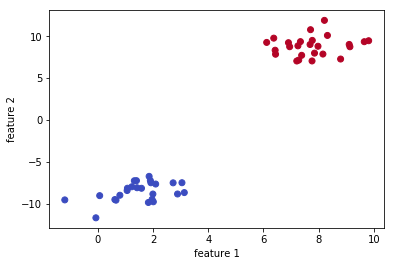

In [109]:
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

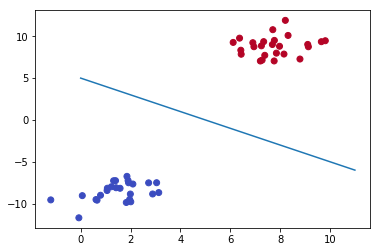

In [111]:
x = np.linspace(0,11,10)
y=-x+5
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)

In [112]:
np.array([1,1]).dot(np.array([[8],[10]]))-5

array([13])

In [113]:
np.array([1,1]).dot(np.array([[4],[-10]]))-5

array([-11])

In [114]:
g = Graph()
g.set_as_default()
x=Placeholder()
w=Variable([1,1])
b=Variable(-5)
z=add(matmul(w,x),b)
a=Sigmoid(z)

In [115]:
sess=Session()
sess.run(operation=a,feed_dict={x:[8,10]})

[<__main__.Variable object at 0x000001ECB2D5ED30>, <__main__.Placeholder object at 0x000001ECB2D5E0F0>, <__main__.matmul object at 0x000001ECB2D67358>, <__main__.Variable object at 0x000001ECB2CACA20>, <__main__.add object at 0x000001ECB2D67198>, <__main__.Sigmoid object at 0x000001ECB2CF00F0>]


0.99999773967570205

In [116]:
sess.run(operation=a,feed_dict={x:[2,-10]})

[<__main__.Variable object at 0x000001ECB2D5ED30>, <__main__.Placeholder object at 0x000001ECB2D5E0F0>, <__main__.matmul object at 0x000001ECB2D67358>, <__main__.Variable object at 0x000001ECB2CACA20>, <__main__.add object at 0x000001ECB2D67198>, <__main__.Sigmoid object at 0x000001ECB2CF00F0>]


2.2603242979035746e-06